# **Dive into Machine Learning: Learning by Implementing**

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/introduction-to-machine-learning.png" width="60%" />

*Avant de commencer*

Utilisez ce lien pour accéder au tutoriel et enregistrez une copie.

<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/Intro_ML_French_Prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2023. Apache License 2.0.

**Auteurs: Espoir Murhabazi, Ulrich A. Mbou Sob**

**Réviseurs: Aaron Joel Lontsi**

**Introduction:**

Dans ce tutoriel, nous explorerons les fondamentaux de l'apprentissage automatique. Nous allons apprendre comment créer et entrainer un classificateur d'apprentissage automatique. Nous allons nous familiariser avec les concepts sur la fonction coût et son optimisation.

**Topics:**

Sujets: Apprentissage Supervisé, Réseau de Neurones, Calcul Numérique.

Niveau: <font color='grey'>`Debutant`


**Objectifs::**

- Comprendre les base des l'apprentissage automatique
- Entrainer un modèle de regression lineaire
- Entrainer un réseau de neurones pour la classification à plusieurs classes.

**Prérequis:**

- Familiarité avec [Numpy](https://numpy.org/doc/stable/user/quickstart.html).

**Outline:**

>[Dive into Machine Learning: Learning by Implementing](#scrollTo=m2s4kN_QPQVe)

>>>[1.1 Types des problèmes d'appentissage automatique](#scrollTo=v2k8dcYR9Hvb)

>>>[1.2 Les données](#scrollTo=1KK-dbRw730T)

>>[Régression](#scrollTo=e9NW58_3hAg2)

>>>[2.1 Régression linéaire](#scrollTo=bA_2coZvhAg3)

>>>>[La fonction de coût et son optimisation](#scrollTo=hNJgESq_LP4R)

>>>>[Entraînement un modèle à l'aide de Jax](#scrollTo=q9dQh9DdLYPE)

>>>[2.2 Régression non-linéaire et réseaux de neurones - Débutant](#scrollTo=BKtMEnRkhAg9)

>>>>[Représentation du modèle](#scrollTo=XStsgHB2MarI)

>>>>[Fonctions d'activation](#scrollTo=fkpytbBzMvMj)

>>>>[Construire un réseau de neurones avec Jax](#scrollTo=3Wrxt2orM7sk)

>>[Classification](#scrollTo=fbTsk0MdhAhC)

>>>[3.1 Régression logistique](#scrollTo=wMgxJU0TOX6O)

>>>>[Logits and Fonction Sigmoïde](#scrollTo=SE1L3rmaO4UP)

>>>>[Extension à la multi-classification](#scrollTo=HjQNjDC2cG2t)

>>>>[Simple réseau de neurones pour la classification](#scrollTo=EcXXE56hPOhK)

>>>>[Entraîner le modèle](#scrollTo=GcSvlekHPWxW)

>>>>[Évaluation du modèle](#scrollTo=sGPvmGWkP1fT)

>>>[Appendix](#scrollTo=742JhcnAxTof)

>>>[Base de JAX [OPTIONAL]](#scrollTo=742JhcnAxTof)

>>>>[Les tableaux JAX sont immuable mais ceux de NumPy arrays ne le sont pas.](#scrollTo=mgu5mHNZ1Esn)

>>>[Derivation of partial derivatives for exercise 2 [OPTIONAL]](#scrollTo=kh_8f4gKyufu)

>>>[Intuition for multi-class CE loss: exercise 3 [OPTIONAL]](#scrollTo=fRYbQvz01Zlm)

>>[Feedback](#scrollTo=o1ndpYE50BpG)


In [ ]:
## Install and import anything required. Capture hides the output from the cell.
# @title Installer et importer les packages requis. (Exécuter la cellule)
!pip install -q clu

import jax
import jax.numpy as jnp
import flax
import flax.linen as nn
from typing import NamedTuple, Any, Dict

import matplotlib.pyplot as plt
import numpy as np

from clu import parameter_overview

from sklearn.datasets import fetch_openml


**Qu'est ce que l'apprentissage automatique (Machine Learning)**

Pendant les deux dernières décennies, le domaine de l'intelligence artificielle (IA) a considérablement évoluer pour influencer d'autres domaines que celui de l'informatique. Les appications telles que YouTube et Netflix utilisent l'IA pour suggérer du contenu à chaque utilisateur en fonction de ces préférences.
<center>
<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/AIvsML.png" width="80%"/>
</center>

L'IA est une science qui a pour objectif le development des systèmes intelligents. **L'apprentissage automatique** est un sous-ensemble de l'IA où l'apprentissage se fait à partir des données en utilisant les techniques de la modélisation statistique. **L'apprentissage profond (deep learning)** quant à lui est un sous-ensenmble de l'apprentissage automatique qui utilise les réseaux de neurones artificielles pour les modélisations.

### 1.1 Types des problèmes d'appentissage automatique

L'apprentissage automatique se base sur l'apprentissage sur les données.  Lors de la formulation d'un problème d'apprentissage automatique, la première question à se poser est de savoir quel type de tâche nous avons. En general les tâches de l'apprentissage automatique peuvent être divisées en 3 catégories.

<center>
<img src="https://www.researchgate.net/publication/354960266/figure/fig1/AS:1075175843983363@1633353305883/The-main-types-of-machine-learning-Main-approaches-include-classification-and.png" width="80%" />
</center>

<font color='red'>Apprentissage supervisé (Supervised Learning)</font>: Dans apprentissage supervisé, nous avons un ensemble de données étiquetées, où chaque point de données d'entrée est associé à la sortie correcte (étiquette). L'objectif est d'apprendre une correspondance entre les entrées et les sorties basée sur les données d'entraînement, de manière à ce que le modèle puisse faire des prédictions précises sur de nouvelles données non vues.

<font color='red'>Apprentissage non supervisé (Unsupervised Learning): </font>: Dans l'apprentissage non supervisé, nour avons des données non labelisées et l'objectif est de trouver des patterns, structures ou relations entre les données. L'algorithme groupe les données similaires et reduit leur dimensions afin de trouver les structures cachées.

<font color='red'>Apprentissage par renforcement (Reinforcement learning):</font>: Dans l'apprentissage par renforcement, l'apprenant apprend à prendre des décisions grâce à l'interaction avec un environment. L'apprenant, (agent) reçoit un feedback comme un gain (encouragement) ou pénalité en fonction des ses actions. Ensuite il apprend à maximiser le gain cumulé au cour du temps.

**Exercise 1.1**: Pour chaque tâche suivante, identifier à quelle catégorie elle appartient.
  -  Apprendre à un robot à marcher.
  -  Prévoir la météo
  -  Classification des emails/spam
  - Apprendre à un ordinateur à jouer aux échecs
  -  Grouper les differentes types de révues de films.

In [ ]:
# @title Solution - Exercise (Essayez de ne pas tricher avant d'avoir fait de sérieux efforts !)
print("Apprendre a un robot a marcher -- Reinforcement learning")
print("Prevoir la meteo -- Supervised learning")
print("Classification des emails/spam -- Supervised learning")
print("Apprendre a un ordinateur a joue aux echecs -- Reinforcement learning")
print("Grouper les differentes types de revues de films -- Unsupervised learning")

### 1.2 Les données

A la fin du tutoriel nous allons construire un classificateur pour le dataset des nombres. Ce dataset contient les images des nombres écrits à la main.

Avant de continuer avec les concepts de l'apprentissage automatique, nous allons visualiser quelques images.

Nous allons telecharger les données avec [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html).

In [ ]:
# Load the MNIST digits dataset
mnist = fetch_openml(name='mnist_784', version=1, as_frame=False, parser='auto')
# Extract the data and labels
images, labels = mnist.data, mnist.target

# Convert labels to integers (they are originally stored as strings)
labels = labels.astype(int)

# Print shapes of the data
print(f"Images have shape: {images.shape}, and labels have shape: {labels.shape}")

# Verify that we have 10 classes
print(f"Number of classes is: {len(np.unique(labels))}")

# Print the min and max values of the images
print(f"Minimum value in images is: {np.min(images)}")
print(f"Maximum value in images is: {np.max(images)}")

Images have shape: (70000, 784), and labels have shape: (70000,)
Number of classes is: 10
Minimum value in images is: 0
Maximum value in images is: 255


Notre ensemble d'aprrentissage consiste de 70000 images en noir et blanc. Chaque image est convertie en un vecteur de taille 784 à partir de sa forme originale 28x28. Nous allons utiliser le code suivant pour afficher quelques images. Notez que chaque fois que vous executez la cellule suivante, vous obtiendrez des images differentes affichees car nous échantillonnons aleatoirement à chaque fois.

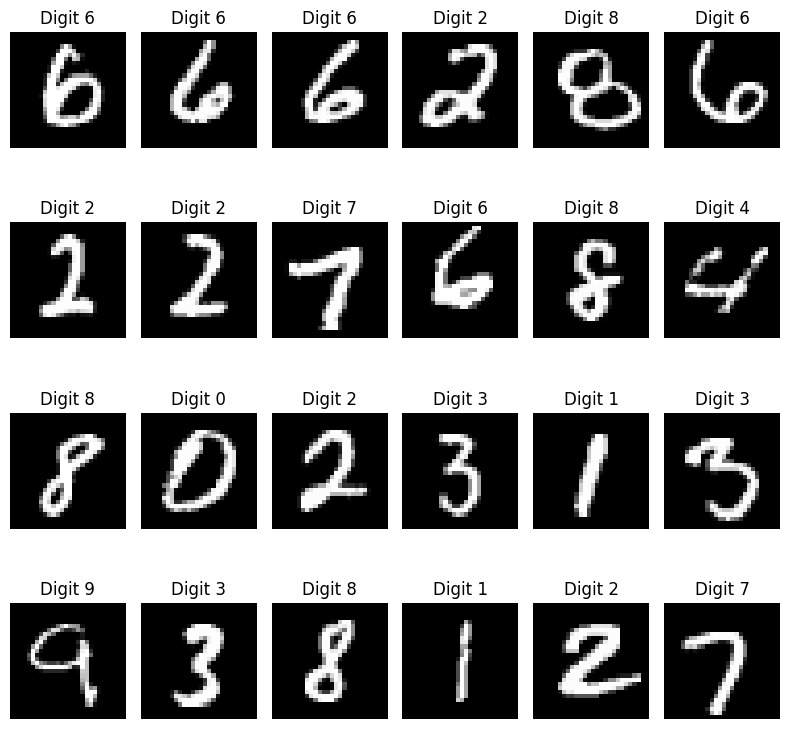

In [ ]:
# @title Affiches des images
def plot_images(images, labels):
  rows = 4
  cols = 6
  num_images = images.shape[0]

  fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

  for ir in range(rows):
    for ic in range(cols):
      sample = np.random.randint(0, num_images)
      image = images[sample].reshape(28, 28)
      axes[ir, ic].imshow(image, cmap='gray')
      axes[ir, ic].axis('off')
      axes[ir, ic].set_title(f"Digit {labels[sample]}")

  plt.tight_layout()
  plt.show()

plot_images(images, labels)

**Excercise:** Exécutez la cellule ci-dessus plusieurs fois et regardez les images. Pouvez-vous identifier certaines images qui pourraient être difficiles à classer ?

## **Régression**

Avant de construire notre classificateur de chiffres, nous devons d'abord comprendre quelques concepts clés de l'apprentissage automatique.

La figure ci-dessous est une répresentation des données generées en utilisant la fonction sinus. En general, nous avons besoin de trouver une fonction qui assigne les entrées dans une dimension à des sorties dans une autre dimension. Le processus qui permet de trouver une telle fonction (**modèle**) est communément appelé **régression**. Dans l'apprentissage automatique, cela fait réference à la recherche d'une fonction qui mappe un ensemble de valeurs numériques appelées **features** à un autre ensemble de valeurs numeriques appelees **labels**. Si la fonction est linaire, le processus est appele **regression lineaire**.
La figure ci-dessous est une répresentation des données generées en utilisant la fonction sinus. En general, nous avons besoin de trouver une fonction qui assigne les entrées dans une dimension à des sorties dans une autre dimension. Le processus qui permet de trouver une telle fonction (**modèle**) est communément appelé **régression**. Dans l'apprentissage automatique, cela fait réference à la recherche d'une fonction qui mappe un ensemble de valeurs numériques appelées **features** à un autre ensemble de valeurs numériques appelées **labels**. Si la fonction est linéaire, le processus est appelé **régression linéaire**.

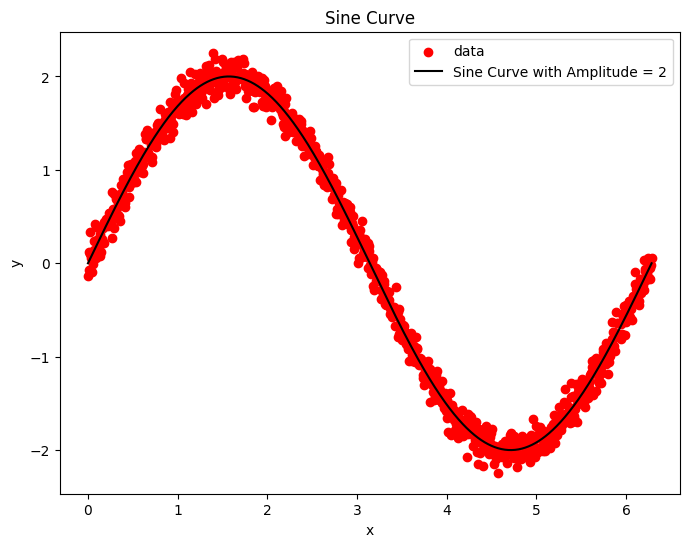

In [ ]:
# @title Code d'aide pour tracer une courbe sinus.
amplitude = 2
x = np.linspace(0, 2*np.pi, 1000)
y = amplitude*np.sin(x) + np.random.randn(1000)*0.1   # Calculate y values using the sine function
yfit = amplitude*np.sin(x)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="data", color='red')
plt.plot(x, yfit, label=f'Sine Curve with Amplitude = {amplitude}', color='black')
plt.title('Sine Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()
plt.show()

### 2.1 Régression linéaire

Supposons que nous avons un dataset, avec des élements $y$ répresentant les labels et les élements $\mathbf{x}$ répresentant nos variables.
Notre objectif est de trouver une fonction $f$ qui relie une variable $\mathbf{x} \in \mathbb{R}^d$ à une variable cible $y$:

Les modèles de régression linéaire peuvent être répresentés mathématiquement comme suit:
$$ f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b,$$
Avec $\mathbf{w} \in \mathbb{R}^d$. $\mathbf{w}$ et $b$ sont les paramètres du modèle communément appelé poids. Le terme $b$ est communément appelé le biais et peut être inclu dans $\mathbf{w}$ en étendant le vecteur de caractéristiques $\mathbf{x}$ avec 1.

Une façon intuitive de comprendre les équations ci-dessus est de se rappeler l'équation d'une ligne $$y \, = \, mx + c,$$ avec les poids et le biais correspondant à la pente et l'intercept, $m$ et $c$ réspectivement.

**Note: pour le reste du tutoriel, nous utiliserons le framework JAX. Si vous n'êtes pas familier avec JAX, veuillez d'abord suivre la section facultative de l'annexe sur [JAX](#scrollTo=742JhcnAxTof) avant de continuer.**

Démonstration: modèle linéaire

In [ ]:
# Example implementation of a linear function computation.

x_key = jax.random.PRNGKey(0)
dim = 10
x = jax.random.uniform(x_key, (dim,))

w_key = jax.random.PRNGKey(1)
w = jax.random.uniform(w_key, (dim,))

b_key = jax.random.PRNGKey(2)
b = jax.random.uniform(b_key, (1,))

y = jnp.dot(w,x) + b  # can also be achieved using: y = x @ w + b

**Tâche de code:**

Dans le precedant code nous avons demontré comment utilise un modèle de régression linéaire avec un seul example dans notre donnée d'apprentrissage. Lorsque nous implementons les modèles d'apprentissage automatique nous tirons l'avantage de l'Algèbre linéaire et et des réssources informatiques disponibles pour traiter des lots de données en une seule fois.

Avec un dataset ou ensemble d'apprentissage $\mathbf{X} \in \mathbb{R}$, écrivez une function qui applique la régression linéaire sur un lot de données $\mathbf{X}$.

In [ ]:
# @title Exécutez ce code pour générer les données
# store the parameters in a dictionary
params = dict(w=w, b=b)

batch_size = 5
X = jax.random.uniform(x_key, (batch_size, dim))
data = jax.random.uniform(x_key, (batch_size,))

In [ ]:
def linear_model(params: Any, X: jnp.ndarray) -> jnp.ndarray:
  # complete this code
  w = params['w']
  b = ... # update me. hint look at the above line for w

  # compute m = f(x) here using w,b and X
  m = ... # update me.

  return m


In [ ]:
# @title Exécutez votre code

def test_linear_model():
  assert (linear_model(params, X) == X @ w + b).all()
  print("Nice! Your answer looks correct.")

test_linear_model()

In [ ]:
# @title Solution - modèle linéaire (Essayez de ne pas tricher avant d'avoir fait de sérieux efforts!)
def linear_model(params: Dict[str, jnp.ndarray], X: jnp.ndarray) -> jnp.ndarray:
  # complete this code
  w = params['w']
  b = params['b']

  # compute m = f(x) here using w,b and X
  m = X @ w + b

  return m

#### La fonction de coût et son optimisation


**Fonction de coût**

Quant nous utilisons un modèle pour apprendre à partir des données, nous avons besoin d'une fonction qui mésure la performance du modèle. Cette fonction est appelée **fonction de coût**. Elle mesure la quantite d'erreur entre notre modèle et les données.

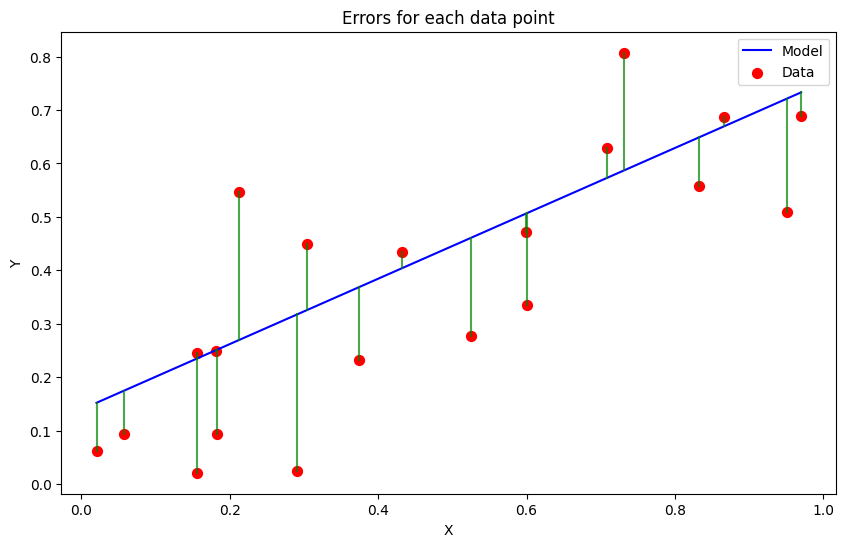

In [ ]:
# @title Code d'aide pour tracer les erreurs
# Set random seed for reproducibility
np.random.seed(42)

# Number of points to generate
num_points = 20

# Generate random points and lines
points_x = np.random.rand(num_points)
slope_random_line = np.random.rand()
intercept_random_line = np.random.rand()

points_y = slope_random_line*points_x + intercept_random_line + np.random.normal(0, 1, num_points)*0.15

# Function to calculate distance from point (x, y) to the line y = mx + b
def distance_to_line(x, y, m, b):
    return abs(y - m * x - b) / np.sqrt(1 + m**2)

# Calculate distances from each point to the random line
distances = distance_to_line(points_x, points_y, slope_random_line, intercept_random_line)

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot the random line
plt.plot(np.sort(points_x), slope_random_line * np.sort(points_x) + intercept_random_line, c='blue', label='Model')

# Plot the points
plt.scatter(points_x, points_y, c='red', label='Data', marker='o', s=50)

# Plot lines from each point to the random line (in different colors)
for i in range(num_points):
    plt.plot([points_x[i], points_x[i]], [points_y[i], slope_random_line * points_x[i] + intercept_random_line],
             c='green', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Errors for each data point")
plt.legend()
plt.show()


Considérer la figure ci-dessous avec les points en rouge. Si la ligne bleue est notre modèle, alors les lignes verticales répresentent les erreurs que nous faisons sur chaque point de données. La fonction de coût capture l'erreur total que nous faisons pour chaque point de données. Une fonction de coût que nous pouvons utilisér dans ce cas est l'erreur moyenne quadratique entre les valeurs prédites et les vraies valeurs.


C'est équivalent a la somme de toutes les distances en vert. Cela peut être écrit mathématiquement comme suit:
$$ \mathcal{L}(\mathbb{θ}) \, = \, \frac{1}{m}∑_{i}({y_i - \hat{y}_i})^2,$$
Avec $\mathbb{θ} = [\mathbf{w}, b]$,  $\mathcal{L}$ denote la fonction de coût, $\hat{y}$ répresente la valeur prédite par le modèle et $m$ est le nombre total des points de données.

En inserrant la fonction de régression linéaire dans la fonction de coût, nous obtenons:

$$\mathcal{L}(\mathbb{θ}) \, = \, \frac{1}{m}∑_{i}(y_i - \mathbf{w}^T\mathbf{x}_i - b)^2. $$


<font color='red'>Note: il existe différentes fonctions de coût que nous pouvons utilisér dans ce cas. Vous pouvez voir d'autres fonctions de coût communes [ici](https://www.geeksforgeeks.org/ml-common-loss-functions/).</font>



**Code task:** implémenter la fonction de perte pour le modèle linéaire défini ci-dessus..



In [ ]:
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  pred = linear_model(params, X)

  loss = ... # your code here

  return 0

In [ ]:
# @title Run to test my code
def test_linear_loss_fn():
  pred = linear_model(params, X)
  loss = jnp.mean((pred-data)**2)
  assert loss_fn(params, X, data) == loss
  print("Nice! Your answer looks correct.")

test_linear_loss_fn()

Nice! Your answer looks correct.


In [ ]:
# @title Sample solution (Essayez de ne pas tricher avant d'avoir fait de sérieux efforts !')
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  pred = linear_model(params, X)

  loss = jnp.mean((pred-y)**2)

  return loss

**Exercice:** Discutez en groupes de la manière dont nous pouvons trouver les paramètres, $\mathbb{θ}$.

**C'est quoi l'optimisation?**

L'optimisation comme son nom l'indique, est la procédure qui permet de trouver les paramètres optimaux du modèle. C'est à dire un ensemble des paramètres qui minimise la fonction de coût. Mathématiquement, nous avons:



$$\hat{\theta} \,= \, \underset{\mathbf{\theta}}{\operatorname{argmin}} \frac{1}{m}∑_{i}(y_i - \mathbf{w}^T\mathbf{x}_i - b)^2.$$

<font color='red'>Comment optimiser?</font>: La figure ci-dessous montre une courbe de la fonction perte pour différentes valeurs de $\mathbf{w}$ et de $b$ pour une ligne droite. La valeur minimale est indiquée is par l'étoile. Notre objectif est de trouver le point optimal par le procéssus d'optimisation.   

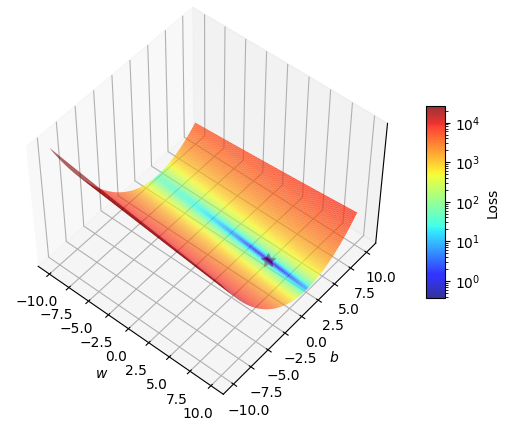

In [ ]:
# @title Code d'aide (pour visualiser la function cout).
# Define the loss function (Mean Squared Error)
from matplotlib.colors import LogNorm

def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Create a grid of weight (slope) and bias (intercept) values
weight_values = np.linspace(-10, 10, 200)
bias_values = np.linspace(-10, 10, 200)
weight_grid, bias_grid = np.meshgrid(weight_values, bias_values)

# Generate random data points for demonstration
np.random.seed(0)
x = np.linspace(0, 20, 200)
y_true = 3 * x + 5 + 0.1 * np.random.normal(0, 1, 200)
y_min = 3*x + 5
minima = np.array([5, 3])
loss_min = loss_function(y_true, y_min)

# Compute the loss for each combination of weight and bias values
loss_grid = np.zeros_like(weight_grid)
for i in range(len(weight_values)):
    for j in range(len(bias_values)):
        y_pred = weight_values[i] * x + bias_values[j]
        loss_grid[i, j] = loss_function(y_true, y_pred)

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

surf = ax.plot_surface(weight_grid, bias_grid, loss_grid, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima, loss_min, 'r*', markersize=10)

ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
# Remove z-axis ticks and labels
ax.set_zticks([])
ax.set_zticklabels([])

# Add color bar for reference
cbar = plt.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel('Loss')

# ax.set_xlim((xmin, xmax))
# ax.set_ylim((ymin, ymax))
plt.show()

Une approche brutale **(brute force)** sérait de calculer la fonction de coût pour diverses valeurs de $\theta$ et choisir une valeur de $\theta$ avec un coût minimale. Bien que cette approche puisse marcher avec un modèle de 1 ou 2 paramètres, elle se complique pour plusieurs paramètres.

**Gradient based optimization**

La meilleur approche est d'utilisér l'analyse linéaire. La derivée d'une fonction est zero à tout point critique (maximum et mininum). Pour trouver $\theta$ qui minimise le coût, nous devons resoudre l'équation. $$\frac{\partial \mathcal{L}}{\partial \theta} \,=\, 0.$$

**Exercice 2:** [OPTIONAL] Pouvez-vous verifier ces éxpressions de dérivation de la fonction de perte ?

$$\frac{∂ \mathcal{L}}{\partial \mathbf{w}} = \frac{2}{m}∑_{i}\mathbf{x}_i(\mathbf{w}^T\mathbf{x}_i + b - y_i),$$

$$\frac{∂ \mathcal{L}}{\partial b} = \frac{2}{m}∑_{i}(\mathbf{w}^T\mathbf{x}_i + b - y_i).$$

Solution ici dans [l'appendix](#scrollTo=kh_8f4gKyufu).

Heuresement nous ne pouvons pas calculer cette fonction par nous même. Les libraries de machine learning nous permettent d'ptimiser ces fonctions. En _jax_ nous pouvons utiliser jax.grad.

In [ ]:
# @title Calcul des dérivées avec jax.grad
# Computing derviatives with jax

def quadratic_fn(x):
  return x**2


# Compute the derivative of quadratic_fn when x = 1
grad_fx =  jax.grad(quadratic_fn)(1.0)
assert grad_fx == 2.0
print(f"Gradient of the function x**2 at x = 1 is {grad_fx} as expected.")

Gradient of the function x**2 at x = 1 is 2.0 as expected.


Plus important Jax calcule la derivée de la même façon même si nos paramètres sont passés dans un autre type de données comme un dictionnaire. Par example, nous pouvons calculer la derivée de notre fonction de coût comme suit.

In [ ]:
# Compute derivatives of the loss_fn with respect to params

grads = jax.grad(loss_fn)(params, X, data)
print(f"gradients: {grads}")

gradients: {'b': Array([4.6627536], dtype=float32), 'w': Array([2.091345 , 1.9300239, 2.740008 , 2.705566 , 1.4073546, 1.8641709,
       1.5042092, 3.331741 , 2.4481251, 2.5431075], dtype=float32)}


Une autre fonction similaire est `jax.value_and_grad`; elle retourne la valeur de la fonction et celle de sa dérivée.


In [ ]:
# Compute derivatives of the loss_fn with respect to params

loss, grads = jax.value_and_grad(loss_fn)(params, X, data)
print(f"loss: {loss}")
print(f"gradients: {grads}")

loss: 5.745656490325928
gradients: {'b': Array([4.6627536], dtype=float32), 'w': Array([2.091345 , 1.9300239, 2.740008 , 2.705566 , 1.4073546, 1.8641709,
       1.5042092, 3.331741 , 2.4481251, 2.5431075], dtype=float32)}


#### Entraînement un modèle à l'aide de Jax

**La Descente de gradient (Gradient Descent)**

Maintenant que nous avons la derivée de notre fonction de coût, nous pouvons utiliser la methode de la descente de gradient pour trouver les paramètres qui minimisent le coût. La descente de gradient est une methode itérative qui commence avec un ensemble aléatoire des paramètres et les met à jour à chaque itération en utilisant la formule suivante:


1. Initialise les paramètres avec des valeurs aléatoires.
2. Boucle pour un nombre d'itérations et à chaque itération met à jour les paramètres en utilisant la formule suivante.

$$ \mathbf{\theta} = \mathbf{\theta} - η\frac{∂\mathcal{L}}{∂\theta},$$
$\eta$ c'est notre frequence d'apprentissage. c'est un hyperparamètre de notre modèle, nous devons le choisir avant.

Intuitivement, si ce paramètre est optimal, le gradient $\frac{∂\mathcal{L}}{∂\theta}$ sera zero et les paramètres deviennent statiques, raison pour laquelle le critère que nous utilisons pendant l'entrainment est de vérifier si les paramètres ont arreté de changer (convergence).
Lorsque nous utilisons un seul point pour calculer la descente de gradient, l'algorithme est appelé **la descente du gradient stochastique.**
Lorsque nous utilisons l'ensemble de notre dataset l'agorithme est appelée la descente **du gradient en batch.** En pratique l'approche utilise un petit groupe de données à chaque étape. Cette approche est celle du **mini batch gradient descent.**


Pendant l'apprrentissage nous parcourons notre dataset à chaque itération. Le parcours de notre dataset s'appele epoch.

Raison pour laquelle un autre hyperparamètre dont nous sommes familier c'est l'epoch.

In [ ]:
# @title Code demonstration: Batch gradient descent implementation
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  n_iter = 0 # number iterations
  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]

      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train.append(loss)

      # Compute the validation loss
      loss_v = loss_fn(params, X_val, y_val)
      loss_val.append(loss_v)

      # Update the parameters
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

      # Update the iter count
      n_iter += 1


  # Plot training and validation loss
  iters = range(1, n_iter+1)
  plt.plot(iters, loss_train, label='Training Loss')
  plt.plot(iters, loss_val, label='Validation Loss')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

In [ ]:
# @title Creation d'un ensemble de données factice pour tester le code
def create_dummy_data_linear_regression():
  """We will generate some random data using our linear function above to test the gradient decent implementation"""

  num_samples = 200
  num_features = 1  # Modify this to have more features

  # Generate random X values in the range [0, 10] for each feature
  key = jax.random.PRNGKey(0)
  X = jax.random.uniform(key, (num_samples, num_features), minval=0, maxval=10)

  # Generate y values based on a linear relationship with some noise
  w = jnp.array([3.0]*num_features)  # True coefficients for each feature
  b = jnp.array([5.0])

  params = dict(w=w, b=b)
  y = linear_model(params, X)

  # Add some noise
  noise = jax.random.normal(key, shape=(num_samples,))*0.30
  y = y + noise

  # Step 2: Split the data into training and validation sets
  train_fraction = 0.8
  num_train_samples = int(train_fraction * num_samples)

  # Shuffle the indices to randomly split the data
  key, subkey = jax.random.split(key)
  shuffled_indices = jax.random.permutation(subkey, jnp.arange(num_samples))

  # Split the indices into training and validation sets
  train_indices = shuffled_indices[:num_train_samples]
  val_indices = shuffled_indices[num_train_samples:]

  # Get the corresponding data points for training and validation sets
  X_train, y_train = X[train_indices], y[train_indices]
  X_val, y_val = X[val_indices], y[val_indices]

  train_data = (X_train, y_train)
  val_data = (X_val, y_val)

  # create some random initial params
  w_init = jax.random.normal(key, shape=(num_features,))
  b_init = 0.0
  initial_params = dict(w=w_init, b=b_init)

  return train_data, val_data, initial_params


def plot_linear_fit(params, X, y):
  """Overlay the data and fitted model"""

  y_pred = linear_model(params, X).squeeze()
  xval = X[:,0]

  plt.figure(figsize=(8, 6))
  plt.scatter(xval, y, label='Data', color='blue')
  plt.plot(xval, y_pred, label='Fit', color='red')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.title('Scatter Points and Fitted Curve')
  plt.show()




In [ ]:
train_data, val_data, initial_params = create_dummy_data_linear_regression()

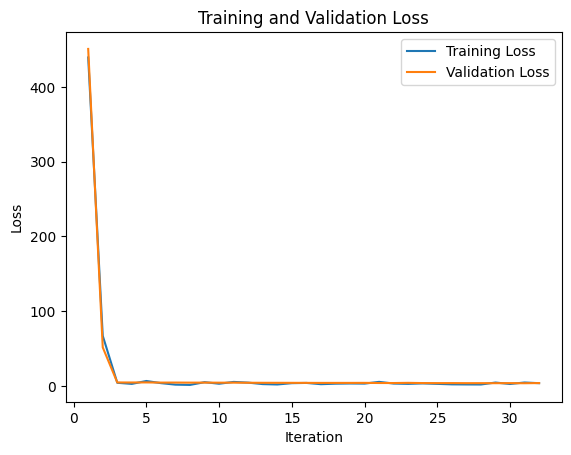

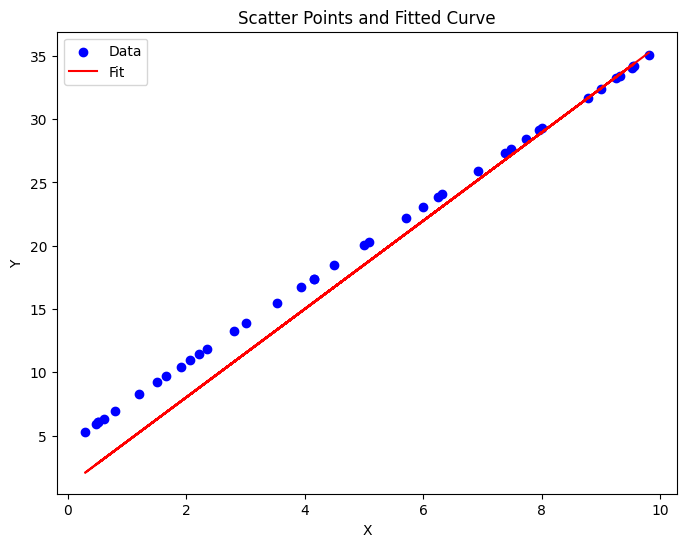

In [ ]:
params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=0.01, num_epochs=2, batch_size=10)

# plot the results on validation data
Xval, yval = val_data
plot_linear_fit(params, Xval, yval)

Our model seems to be **underfitting** that data because the fitted line is going through very few of the points.

Notre modèle semble **Sous-ajuste** les données parce que la ligne ajustée passe par très peu de points.

**Exercice:** Discuter en groupe comment nous pouvons ameliorer notre modèle.

**Code task:** Modifier le taux d'apprentissage, la taille du lot et le nombre d'epochs et observer leurs éffets sur les resultats.

**Tips:**

- En pratique, les gens choisissent généralement des taux d'apprentissage dans la plage de 0,01 et 1e-5.
- Les petites tailles de lots peuvent introduire trop de bruit dans les gradients et cela peut affecter la vitesse de convergence.
- D'autre part, les grandes tailles de lots peuvent prendre plus de temps à converger car les paramètres ne sont pas mis à jour très fréquemment.
- Noter que l'utilisation d'un très grand nombre d'epochs rendra l'entraînement long car nous n'avons inclus aucun critère d'arrêt.

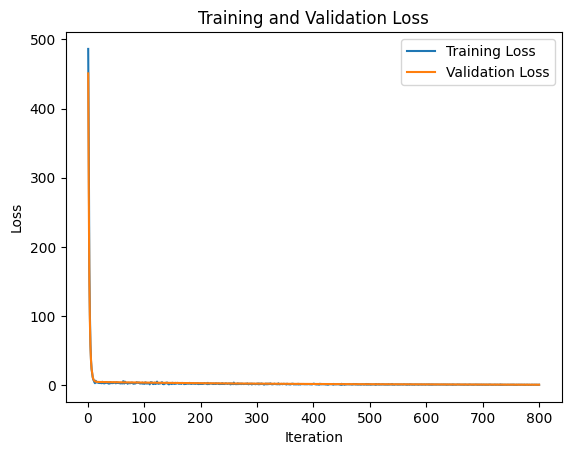

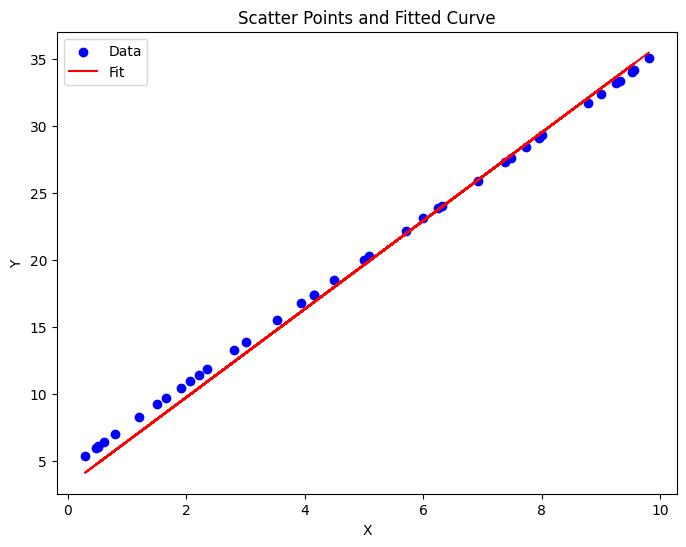

In [ ]:
# @title Votre code
learning_rate = 0.00291 #@param {type:"slider", min:1e-5, max:1e-2, step:1e-4}
batch_size = 20 #@param {type:"slider", min:1, max:5000, step:10}
num_epochs = 100 #@param {type:"slider", min:2, max:500, step:20}

params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=learning_rate, num_epochs=num_epochs, batch_size=batch_size)

# plot the results on validation data
Xval, yval = val_data
plot_linear_fit(params, Xval, yval)

### 2.2 Régression non-linéaire et réseaux de neurones

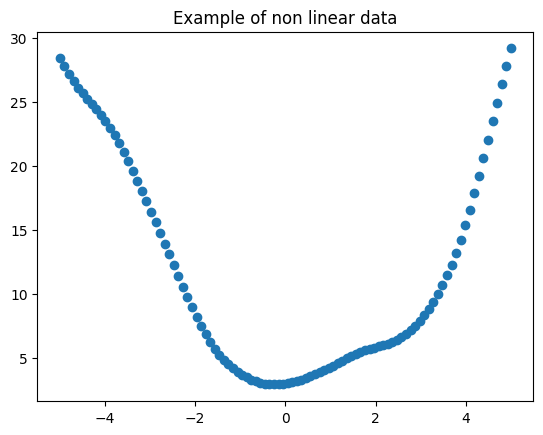

In [ ]:
# @title Code pour tracer des données non linéaires
def plot_nonlinear_data():

  x = np.linspace(-5, 5, 100)
  y = np.cos(x)*x + x**2 + np.exp(-x/7)*3 + 0.3*x*np.sin(x)**4

  plt.scatter(x, y)
  plt.title("Example of non linear data")
  plt.show

plot_nonlinear_data()

La régression linéaire est une methode simple et puissance pour la prédiction. Cette methode possède des limitiations lorsqu'on doit capturer des rélations complexes. Pour modeliser ce genre de complexité, we avons besoin des modèles puissants. Par example aucune line ne peut s'ajuster aux données de la figure précédente.
Les modèles non-linéaire comme la régression polynomiale, exponentielle ou les fonctions trigonométriques offrent des solutions à ce problème.

A cause de l'explosion des techniques de l'apprentissage profond (deep learning) ajuster les fonctions prédéfinies à nos dataset etait les methodes par excellence pour les algorithmes d'apprentissage automatique.
le Support Vector Machine (SVM), Naive-Bayes et K-means sont des approches classiques.

Dans cette section nous allons introduire les réseaux de neurones qui sont à la base des methodes d'apprentissage profond et du succès récent dans le domaine de l'apprentissage automatique.

#### Représentation du modèle


<center>
<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/neutral-network-diagram.svg" width="80%" />
</center>

      Image of a neural network with 3 hidden layers. Credit: https://www.tibco.com/reference-center/what-is-a-neural-network





Les réseaux de neurones sont un ensemble de modèles d'apprentissage automatique inspirer par manière dont le cerveau humain fonctionne.  

Contrairement à la régression linéaire qui applique une seule transformation aux données, les réseaux de neurones traitent les données d'entrée à travers une série des transformations avant d'atteindre la couche de prédiction finale. Le terme <font color='red'>Deep Learning</font> vient des nombreuses transformations appliquées aux données d'entrée.


Dans l'image ci haut les cercles répresentent les noeuds et les liens qui les connectent répresentent les paramètres du modèle.

#### Fonctions d'activation

Les fonctions d'activation sont importantes pour les réseaux de neurones. L'entrée de chaque noeud est une fonction linéaire des noeuds de la couche précédente. Sans appilquer la fonction d'activation ou la non-linéairité, l'ensemble du réseau, peu importe le nombre de couches  se réduit à un simple modèle linéaire. Pour cette raison, les fonctions d'activation sont utilisées pour construire des rélations non-linéaires et complexes.


L'équation pour le noeud $i$ dans la couche $j$ d'un réseau de neurones peut être exprimer comme suit:

$$ \text{Output}_{ij} = \text{Fonction d'activation} \left( \sum_{k=1}^{n} \text{Weight}_{ijk} \times \text{Output}_{(j-1)k} + \text{Bias}_{ij} \right)$$

Where:
- $\text{Output}_{ij}$ est la sortie du noeud $i$ de la couche $j$.
- $\text{Weight}_{ijk}$ est le poids connectant le noeud $i$ de la couche $j$ au noeud $k$ de la couche $j-1$.
- $\text{Output}_{(j-1)k}$ est la sortie du noeud  $k$ de la couche $j-1$.
- $\text{Bias}_{ij}$ est le biais du noeud $i$ de la couche $j$.
- $\text{Fonction d'activation}$ est la fonction d'activation choisie pour introduire la non-linéairité à la sortie de la neurone.




Voici quelques fonctions d'activation les plus utilisées:

- $\text{ReLU}(x) \, = \, \text{max}(0, x)$

    La fonction d'activation Rectified Linear Unit (ReLU) est la plus populaire. Elle mappe son entrée dans l'intervalle $[0, ∞]$ en transformant toutes les valeurs négatives en 0. La fonction et sa derivée sont monotones. Cependant, cette fonction d'activation à le probleme de transformer toutes les entrées négatives en 0 et de diminuer la capacité du modèle à bien s'adapter aux donnees.

- $\text{Sigmoid}(x) \, =\, \frac{1}{1+e^{-x}}$

    La fonction d'activation sigmoid mappe son entrée dans l'intervalle $[0, 1]$. C'est ideal pour prédire les probabilités. La fonction est différentiable et monotone mais sa derivée n'est pas monotone. Parce que sa derivée n'est pas monotone, il n'est pas ideal d'utiliser cette fonction d'activation pour les couches cachées car elle bloque le transfert d'informations entre les couches. Par conséquent, l'activation est appliquée uniquement aux couches de sortie.

- $\text{tanh}(x)\, = \, \frac{e^x - x^{-x}}{e^x + e^{-x}},$
  
     L'activation $tanh$ est similaire à l'activation sigmoid mais elle mappe les entrées dans l'intervalle $[-1, 1]$. Cette plage plus large permet une répartition beaucoup plus uniforme lors de la prédiction des probabilités. De même que l'activation sigmoid, le $tanh$ est le plus souvent appliqué aux couches de sortie des reseaux des neurones.


Implementation de la fonction d'activation [ReLU](https://arxiv.org/https://arxiv.org/abs/1803.08375abs/1803.08375).

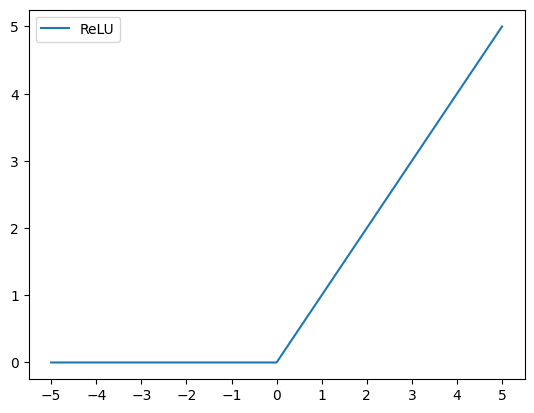

In [ ]:
# Implementation of relu using simple python.

def relu(x):
  if x > 0 :
    return x
  else:
    return 0

def plot_activation(act_fn, label="act_fn"):
    max_int = 5
    # Generete 100 evenly spaced points from -max_int to max_int
    x = np.linspace(-max_int, max_int, 1000)
    y = np.array([act_fn(xi) for xi in x])
    plt.plot(x, y, label=label)
    plt.legend(loc="upper left")
    plt.xticks(np.arange(min(x), max(x) + 1, 1))
    plt.show()

plot_activation(relu, label='ReLU')

**Code Task:** Implementer et tracer une autre fonction d'activation de votre choix.

In [ ]:
# @title Insérer votre code votre code ici
def act_fn(x):
    # type your code here

    y = ...#
    return y

# Call the plotting function
plot_activation(act_fn, label=....) # update this



#### Construire un réseau de neurones avec Jax

Heuresement, nous avons differents modules dans jax qui peuvent être utiliser pour déveloper des réseaux de neurones et nous n'allons rien implementer partir à de zéro. Pour les modèles avec jax nous pouvons utiliser flax ou haiku. Dans cette section nous allons utiliser flax.



In [ ]:
# @title Demonstration: Construction d'un simple réseau de neurones avec flax
# Code for a 4-layer neural network using haiku.
# Here assume all the hidden layers have the same number of nodes.
# We will use the same activation relu for all the layers except the last layer.

class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

<!--The cell above is a basic example of how we can define a neural network using flax. Each linear transformation is implemented using the `nn.Dense` function, and we use `jax.nn.relu` to apply non-linearities to the output of each layer.-->

La cellule ci-dessus démontre comment définir un simple réseau de neurones avec `flax`. Chaque transformation linéaire est implémenté par la fonction `nn.Dense` et `jax.nn.relu` est utilisé pour appliquer la non-linéarité aux sorties de chaque couche.

In [ ]:
# @title Démonstration : initialisation du modèle
seed = 32
input_size = 4
hidden_size = 5
output_size = 1

# Calling the build_neural_network function and applying the required transformations
model = Network(hidden_size, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

# Let's use the CLU: https://github.com/google/CommonLoopUtils to examine the shape of the parameters
print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))

+-----------------------+--------+------+
| Name                  | Shape  | Size |
+-----------------------+--------+------+
| params/Dense_0/bias   | (5,)   | 5    |
| params/Dense_0/kernel | (4, 5) | 20   |
| params/Dense_1/bias   | (5,)   | 5    |
| params/Dense_1/kernel | (5, 5) | 25   |
| params/Dense_2/bias   | (1,)   | 1    |
| params/Dense_2/kernel | (5, 1) | 5    |
+-----------------------+--------+------+
Total: 61


<!-- **Exercise:** Do you understand the shape of the different parameters? -->

**Exercice:** Comprenez-vous la forme des différents paramètres ?

Le code ci haut démontre comment créer une instance du modèle pour obtenir les paramètres initiaux. Apres avoir crée une instance du modèle en utilisant la classe `Network` nous appelons la fonction `init` avec un `jax.random.PRNGKey` et quelques entrées factices à partir desquelles la forme des paramètres sera prédite.



Pour appliquer le modèle a des données nous avons besoin d'appeler la fonction `model.apply` avec les paramètres actuels et les données d'entrée.

In [ ]:
z = model.apply(initial_params, dummy)
print(f"Model ouput shape: {z.shape}, Input shape: {dummy.shape}")

Model ouput shape: (1, 1), Input shape: (1, 4)


## **Classification**
Maintenant que nous nous sommes familiarisés avec les fondenmentaux de l'ajustement d'un model,et son entrainement et que nous savons comment construire les réseaux des neurones, nous allons nous focaliser sur notre objectif principale qui est la construction de notre classificateur de nombres.


### 3.1 Régression logistique

La régression linéaire a pour objectif de trouver une fonction $f$ qui mappe nos **entrées $x$**, ou $x \in \mathbb{R}^d$ aux **sorties/output/target - $y$**, ou $y \in \mathbb{R}^n$ (les valeurs de sortie sont continues). Contrairement à la régression, la **sortie/output/target -$y$** ne peut prendre que certaines valeurs dans la régression logistique. Lorsque la **sortie/target** ne peut prendre que l'une des deux valeurs, l'algorithme est appelé **Classification Binaire**. Lorsque nous avons plus de deux catégories, on parle de **Classification Multi-Classes**.

C'est pourquoi l'objectif de la régression logistique (dans le cas de la classification binaire) est de mapper les **entrées $x$**, où $x \in \mathbb{R}^d$ à $y$, où $y \in \{0,1\}$.


Par example, si nous construisons un classificateur d'images pour chien et chat, 1 peut être utilisé pour répresenter les valeurs de sortie pour les chats et 0 pour les chiens.

#### Logits and Fonction Sigmoïde


Vu que la sortie de la régression logistique est discrète. C'est n'est pas facile de définir une fonction qui produit les valeurs discrètes. Pour cette raison, la fonction est construite pour prédire des probabilités. Rappelons que les les probabilités prennent des valeurs dans l'intervale [0, 1], raison pour laquelle nous avons besoin d'une fonction qui produit des probabilités.  La **fonction sigmoïde** est une bonne fonction d'activation.
<br>
<center>

 $$\sigma(x) = \frac{1}{1+e^{-x}}$$

 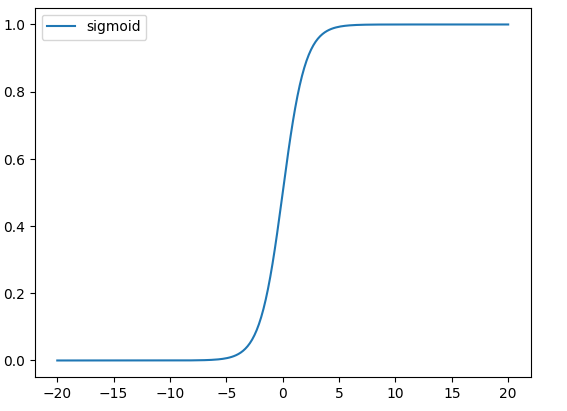
</center>
<br>
<br>


**Cross entropy loss function**: **Fonction de perte d'entropie croisée**

Vu que pour la classification binaire nous ne pouvons qu'avoir deux valeurs de sortie, la fonciton de l'erreur moyenne quadratique n''est pas appropriée pour la régression logistique. La fonction la plus utilisée est **la fonction de perte d'entropie croisée**. Elle est défine de la façon suivante:


<br>
<center>

 $$ -y_i \log(p_i) - (1-y_i) \log (1-p_i),$$

</center>
where $p_i = \sigma (z)$ with $z$ being the output of our model function.
<br>

**Tâche**:

1. Implementer la fonction d'activation sigmoïde.
2. Implementer la fonction de coût d'entropie croisée.


In [ ]:
def sigmoid(x):
    """sigmoid function 1/1+e^-x"""

    prob = ... # update me

    return prob

In [ ]:
# @title Executez cette cellule pour tester votre code
def test_sigmoid_fn():
  x  = np.array([0.7, 0.3, 0.8, 0.2])
  assert jnp.allclose(sigmoid(x), jax.nn.sigmoid(x)), "Test failed!"
  print("Nice! Your answer looks correct!")

  return

In [ ]:
# @title Solution fonction sigmoïde (Essayez de ne pas tricher avant d'avoir fait de sérieux efforts !)
def sigmoid(x):
  prob = 1/(1+jnp.exp(-x))

  return prob

In [ ]:
def cross_entropy_loss(predictions, targets):
    # you need to make sure we never have log of 0

    # use sigmoid to compute the probs from the predicitions
    probs = ... # update me

    # your code here
    loss = ... # update me

    return loss

In [ ]:
# @title Executez cette cellule pour tester votre code
def test_cross_entropy_loss():
  predictions = np.array([0.7, 0.3, 0.8, 0.2])
  targets = np.array([1, 0, 1, 0])

  # Expected cross-entropy loss for the test data
  expected_loss = 0.60669523

  # Calculate the cross-entropy loss using the implemented function
  computed_loss = cross_entropy_loss(predictions, targets)

  assert jnp.isclose(computed_loss, expected_loss), "Test failed!"

  # If the assert statement does not raise an exception, the test is passed.
  print("Nice! Your anwser looks correct")

  return

test_cross_entropy_loss()

In [ ]:
# @title Solution fonction de perte d'entropie croisée (Essayez de ne pas tricher avant d'avoir fait de sérieux efforts!)
def cross_entropy_loss(preds, targets):
    eps = 1e-15
    probs = sigmoid(preds)

    loss = -targets*jnp.log(probs+eps) - (1-targets)*jnp.log(1-probs+eps)

    return jnp.mean(loss)

#### Extension à la multi-classification

Avec la multi-classification, le modèle est construit de façon à supporter plusieur classes. Avec chaque classe qui répresente une categorie ou une étiquette. Par example, dans le cas d'une classification des nombres, nous avons 10 classes, chaque classe répresente un nombre de 0 à 9.

La sortie du modèle est la distribution de probabilité pour chaque classe. La dimension de notre sortie correspond donc nombre de classes. Par example un classificateur avec 3 classes aura un vecteur à 3 dimensions.
Pour prédire le modèle, on selectionne la classe avec la plus grande probablilité.

**Encodage One-hot: or one-hot encoding**

L'encodage one-hot est une façon de répresenter les variables catégoriques comme des vecteurs binaries. Dans le cas d'une classification binaire avec 3 classes, notre sortie est representée comme un vecteur one-hot de la manière suivante.

**classe 1** [1, 0, 0]: ceci veut dire que notre donnée appartient à la premiere classe. Le premier élement du vecteur est 1 et les autres zeros.


**classe 2** [0, 1, 0]: ceci veut dire que notre donnée appartient à la deuxieme classe. Le deuxieme élement du vecteur est 1 et les autres zeros.

**classe 3** [0, 0, 1]: ceci veut dire que notre donnée appartient à la troisieme classe. Le troisieme élement du vecteur est 1 et les autres zeros.

__Exercice__ discuter comment on défine la fonction de coût pour la multi-classification.


La fonction de coût pour une multi-classification est définie de la même manière que la fonction pour un classificateur binaire. Par contre pour ce cas nous définissons la fonction de coût comme la somme de coût pour chaque classe pris séparement...

On peut utiliser la fonction `jax.nn.one_hot` pour encoder les données.


In [ ]:
# An example using one hot encoding
num_classes =  3
targets = jnp.array([2, 0, 1])
one_hot_targets = jax.nn.one_hot(targets, num_classes)
print(f"Example of One hot encordings: {one_hot_targets}")

<!-- **Exercise**: Discuss with your neighbour how we should define the loss function in the case of multi-class classification. -->

**Exercice**: Discutez avec votre voisin de la manière dont nous devrions définir la fonction de perte dans le cas d'une classification multi-classes

<!--**Solution**: The loss function for a multi-classification is computed similarly to that of a binary classifier. However in this case we define the loss as the sum of the loss for each of the individual classes.-->
**Solution**: La fonction de perte pour une multi-classification est calculée de la même manière que celle d'un classificateur binaire. Cependant, dans ce cas, nous définissons la perte comme la somme des pertes pour chacune des classes individuelles.
<br>
<center>

 $$ \sum_c -y^c_i \log(p^c_i),$$

</center>

where $p^c_i = \text{softmax}(z) = \frac{e^{z^c_i}}{\sum_c e^{z^c_i}}$ with $z$ being the output of our model function.

<br>
<!--The main difference here is that we use a $\text{softmax}$ activation function instead of $\text{sigmoid}$ as for the binary case.-->
La principale difference ici est l'utilisation de la fonction d'activation $\text{softmax}$ au lieu de la fonction d'activation sigmoïde utilisée pour la classification binaire


**Exercise 3 [OPTIONAL]**: Avez-vous une intuition que cette formule est similaire à celle de la classification binaire ? <!--Do your get the initution why this formula is similar to that for the binary case?-->

**Solution**: Défilez jusqu'à l' [Appendix](#scrollTo=fRYbQvz01Zlm).

**Tâche**:
  1. Implémenter la fonction d'activation softmax <!--the softmax activation function-->
  2. Implémenter une fonction de perte d'entropie croisée pour la classification multiclasse utilisant softmax et un codage "one-hot".

In [ ]:
def softmax(logits):
  """Compute softmax: `exp(x)/sum(exp(x))`

  Args:
    logits: array of shape (num_samples, num_classes)

  Return:
    probs: array of shape (num_samples, num_classes)
  """

  # your code here
  # make sure you sum across the right axis

  probs = ... # update me

  return probs

In [ ]:
# @title Executez cette cellule pour tester votre code
def test_softmax():
  x = jnp.array([[1.0, 0.4, 0.3], [10.0, 4.6, 8.9]])
  assert jnp.allclose(softmax(x), jax.nn.softmax(x, axis=-1))
  print("Nice! Your answer looks correct.")

test_softmax()

Nice! Your answer looks correct.


In [ ]:
# @title softmax solution (Essayez de ne pas tricher avant d'avoir fait de sérieux efforts !)
def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)

In [ ]:
def cross_entropy_softmax_loss(predictions, targets):
    """Compute the cross entropy softmax loss function

      Args:
        predictions: (num_samples, num_classes)
        targets: (num_samples)
    """

    # Compute the softmax probabilities
    probs = ... # update me

    num_classes = ... # update me

    # One-hot encode the targets
    targets_one_hot = ... # update me

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss = ... # update me

    return loss

In [ ]:
# @title Executez cette cellule pour tester votre code
def test_cross_entropy_softmax_loss():
  # Fixed predictions (logits) for each class
  predictions = jnp.array([[1.5, 0.3, 2.7],
        [0.8, 1.2, 3.1], [2.3, 1.7, 0.5],
        [3.0, 0.5, 1.2], [0.2, 2.8, 1.0]])

  # Fixed true class labels
  targets = jnp.array([2, 1, 0, 0, 2])

  # Expected loss computed manually
  expected_loss = 1.0456787

  # Compute the cross-entropy softmax loss using your implementation
  loss = cross_entropy_softmax_loss(predictions, targets)

  # Check if the computed loss matches the JAX built-in loss
  assert jnp.allclose(loss, expected_loss), "Loss value do not match!"

  print("Nice! Your answer looks correct.")

test_cross_entropy_softmax_loss()

In [ ]:
# @title Solution: softmax à entropie croisée (Essayez de ne pas tricher avant d'avoir fait de sérieux efforts!)
def cross_entropy_softmax_loss(predictions, targets):
    """Compute the cross entropy softmax loss function

      Args:
        predictions: (num_samples, num_classes)
        targets: (num_samples)
    """

    # Compute the softmax probabilities
    probs = softmax(predictions) # update me

    num_classes = predictions.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes) # update me

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1) # update me

    return jnp.mean(loss_i)

#### Simple réseau de neurones pour la classification

Dans cette section nous allons mettre en place toutes les différentes pièces et entrainer notre résau de neurones pour la classification. Rappelons les outils que nous avons mentionner initialement qui sont necessaire pour entrainer un modèle d'apprentissage automatique.

- Nos donnée d'apprentissage ou dataset.
- La fonction du modèle
- la fonction de coût
- et la fonction d'optimisation
Nous allons utiliser `sklearn`, nous n'allons pas discuter le traitement des données (data processing) mais en pratique nous le faisons avant.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import jax
import jax.numpy as jnp
from typing import NamedTuple, Any

import matplotlib.pyplot as plt
import numpy as np

# Let re-adapt our batch gradient descent function
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    loss_train_epoch = []

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]
      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train_epoch.append(loss)

      # Update the parameters
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

    # We need to turn the list in to an array before applying jnp.mean
    mean_loss = jnp.mean(jnp.array(loss_train_epoch))
    loss_train.append(mean_loss)

    # Compute the validation loss at the end of the epoch
    loss_v = loss_fn(params, X_val, y_val)
    loss_val.append(loss_v)

  # Plot training and validation loss
  epochs = range(1, num_epochs+1)
  plt.plot(epochs, loss_train, label='Training Loss')
  plt.plot(epochs, loss_val, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

# Load the mnist dataset
def load_dataset(seed):
  mnist = fetch_openml(name='mnist_784', version=1, as_frame=False)
  # Extract the data and labels
  images, labels = mnist.data, mnist.target

  # These images consist of integer values from 0 to 255.0
  # We scale the images to min and max of 1
  x_max = 255.0
  x_min = 0.0

  images = (images - x_min)/(x_max - x_min)
  images = images.astype(jnp.float32)
  labels = labels.astype(jnp.float32)

  # These are images of shape 28x28 which have been flatten to shape 784
  X_train, X_test, y_train, y_test = train_test_split(
      images, labels, test_size=0.2, train_size=0.8, random_state=seed
  )

  train_dataset = (X_train, y_train)
  test_dataset = (X_test, y_test)

  return train_dataset, test_dataset

training_data, val_data = load_dataset(32)

**Tâche:**
1. Construisez un réseau de neurones qui génère des logits pour chacune des 10 classes. <!--Build a neural network that outputs logits for each of the 10 classes.-->
2. Initialisez votre modèle avec des entrées factice. <!--Initialise your model with some dummy input.-->
3. Définissez votre fonction d'entropie croisée softmax. <!--Define your softmax cross entropy function.-->

In [ ]:
# @title Completez le code
class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = ...  # update me
    x = ...  # update me

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

# transform and intialiase the model.
seed = 32
input_size = 784 # remember our features are images of shape 28x28 flatten
hidden_size = ... # update me
output_size = ... # update me (hint: number classes)

# instantiate the model
model = Network... # update me

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)


def cross_entropy_softmax_loss(params, X, targets):
    """Compute the cross entropy softmax loss function

      Args:
        params: model parameters
        X: features arrary (num_samples, num_features)
        targets: (num_samples)
    """

    # use the model to compute the predictions
    preds = model.apply(params, X)

    # Compute the softmax probabilities
    probs = softmax(preds)

    num_classes = preds.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes)

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1)

    return jnp.mean(loss_i)


In [ ]:
# @title Exemple de solution (Essayez de ne pas tricher avant d'avoir fait de sérieux efforts !)
class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

# transform and intialiase the model.
seed = 67
input_size = 784
hidden_size = 100
output_size = 10

# Instantiate the model
model = Network(hidden_size, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)

def cross_entropy_softmax_loss(params, X, targets):
    """Compute the cross entropy softmax loss function

      Args:
        params: model params
        X: (num_features, num_classes)
        targets: (num_samples)
    """

    preds = model.apply(params, X)

    # Compute the softmax probabilities
    probs = softmax(preds)

    num_classes = preds.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes)

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1)

    return jnp.mean(loss_i)


#### Entraîner le modèle




**Tâche:**
  1. Utilisez la fonction `batch_gradient_descent` pour entraîner le modèle.
  2. Variez le `learning_rate` et le `batch_size` et observez le changement de la fonction de perte.

In [ ]:
params = batch_gradient_descent ... # update me

In [ ]:
# @title Exemple de solution (Essayez de ne pas tricher avant d'avoir fait de sérieux efforts !)
params = batch_gradient_descent(cross_entropy_softmax_loss, initial_params, training_data, val_data, learning_rate=0.01, num_epochs=10, batch_size=1000)

#### Évaluation du modèle
Jusqu'a présent nous n'avons vu qu'une seule méthode pour évaluer notre modèle: la fonction de coût.

Par contre, lors de l'évaluation d'un modèle d'apprentissage automatique plusieurs méthodes peuvent être utiliser.  Les hyperparamètres sont selectionner en fonction de la métrique qu'on optimise. Voici quelques métriques que nous pouvons utilser pour nos tâches de classification.

*   **Accuracy**:  c'est la métrique la plus importante pour les tâches de classification. Elle mésure la proportion des instances classifier correctment: $$ \text{Accuracy} = \frac{\text{Nombre des prediction correctes}}{\text{total nombres des predictions}}$$

* **Precision**: c'est la mésure des prédictions positives, Par example si notre modèle prédit 100 points qui appartiennent à la classe 1, notre precision sera le pourcentage de ces 100 points qui appartiennent à la classe 1. Une grande précision est néccessaire pour un diagnostic des images. Nous ne voulons pas faire des précision inutiles qui pourons engendrer de traitement non neccessaire.

* **Recall**: Il s'agit d'une mésure de la capacité du modèle à identifier de manière efficiente toutes les instances positives. Par exemple, si l'ensemble de données comporte 100 points de données appartenant à la classe 1, combien sont effectivement classifiés comme appartenant à la classe 1 ? Le rappel revêt une importance primordiale dans les scénarios où l'omission d'une seule instance positive n'est pas souhaitée. Prenons l'exemple d'une entreprise de sécurité : nous ne souhaitons pas attribuer à tort la classification "sûr" à un signal émis par un utilisateur alors qu'il est en réalité en situation de danger.

<!--**Let's use accuracy to evaluate the performance of our trained classifier.**-->
**Utilisons l'`accuracy` pour évaluer la performance du classificateur**

Tout d'abord, définissons une fonction de prédiction qui transforme la sortie du modèle en classe. Rappelons que la sortie du classificateur est composée de logits, correspondant à des probabilités non normalisées pour chaque classe. Ainsi, la classe prédite est celle avec la probabilité la plus élevée.
  

**Tâche**
  1. Implémentez une fonction appelée "model_predict" qui sélectionne la classe appropriée à partir de la sortie du modèle.

In [ ]:
# @title Completez ce code
def model_predict(params, X):
    """Use the model for predicition

      args:
        params: model parameters
        X: features array (num_samples, num_features)

      return
        pred: predicted class (num_samples, 1)
    """

    # call the model to compute the logits
    logits = model... # update me
    preds = ... # update me: hint use jnp.argmax

    return preds

In [ ]:
# @title Executez cette cellule pour tester votre code
def test_model_predict():
    features = val_data[0][0:10]
    preds = model_predict(params, features)
    expected = jnp.argmax(model.apply(params, features), axis=-1)
    assert jnp.array_equal(preds, expected), "Failed! try again"
    print("Nice! Your answer looks correct.")

test_model_predict()

In [ ]:
# @title Exemple de solution: model_predict (Essayez de ne pas tricher avant d'avoir fait de sérieux efforts!)
def model_predict(params, X):
    """Use the model for predicition

      args:
        params: model parameters
        X: features array (num_samples, num_features)

      return
        pred: predicted class (num_samples, 1)
    """

    # call the model to compute the logits
    logits = model.apply(params, X)
    preds = jnp.argmax(logits, axis=-1)

    return preds

In [ ]:
# @title Evaluez l'accuracy de votre modèle
def compute_accuracy(data):
  """Compute the accuracy of the model"""

  X, y_true = data
  y_pred = model_predict(params, X).squeeze()

  acc = sum(y_pred==y_true)/len(y_true)

  return acc

train_acc = compute_accuracy(training_data)
val_acc = compute_accuracy(val_data)
print(f"The training accuracy is {train_acc} while the validation accuracy is {val_acc}")



Félicitations, nous venons d'entraîner un modèle d'apprentissage automatique pour la classification en utilisant le dataset populaire mnist digit.

**Excercice**:
- Etes-vous satisfait de la precision de votre modèle?
- Que pouvez vous faire pour améliorer la précision de votre modèle?



**Conclusions**
**Resumé**

- L'apprentissage automatique est la science de l'utilisation des données pour construire des systèmes intelligents.
- L'apprentissage profond est le sous-ensemble des méthodes d'apprentissage automatique qui utilise des réseaux de neurones.
- L'optimisation est le procéssus de recherche des paramètres qui rendent la fonction de perte aussi petite que possible.
- JAX est un nouveau framework populaire qui peut être utilisé pour calculer les dérivées et former des modèles d'apprentissage automatique.

**Prochaines étapes:**
 - Participez à d'autres tutoriels comme Math for Machine Learning, pour lequel nous avons également une version française.

**Références:**


1. https://d2l.ai/chapter_linear-networks/linear-regression.html
2. https://jax.readthedocs.io/en/latest/notebooks/quickstart.html
3. https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning
4. https://www.javatpoint.com/machine-learning
5. Aurelien Genon, Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, 2nd Edition, O'Reilly Media, 2019.

### Appendix

### Base de JAX [OPTIONAL]

Pendant ce tutoriel, nous avons utilisé le framework [JAX](https://jax.readthedocs.io/en/latest/) pour illustrer les différents concepts discutés. Jax est similaire à numpy mais il existe quelques differences qui doivent être mentionnés.

Similarités entre JAX et Numpy

In [ ]:
# Create NumPy arrays
np_array1 = np.array([1, 2, 3])
np_array2 = np.array([4, 5, 6])

# Create JAX arrays
jax_array1 = jnp.array([1, 2, 3])
jax_array2 = jnp.array([4, 5, 6])

# Element-wise addition using NumPy
np_result = np_array1 + np_array2
print("NumPy result:", np_result)

# Element-wise addition using JAX
jax_result = jax_array1 + jax_array2
print("JAX result:", jax_result)

In [ ]:
# Array concatenation using NumPy
np_array1 = np.array([1, 2, 3])
np_array2 = np.array([4, 5, 6])
np_concatenated = np.concatenate([np_array1, np_array2])

# Array concatenation using JAX
jax_array1 = jnp.array([1, 2, 3])
jax_array2 = jnp.array([4, 5, 6])
jax_concatenated = jnp.concatenate([jax_array1, jax_array2])

In [ ]:
# Element-wise functions using NumPy
np_array = np.array([0, np.pi/2, np.pi])
np_sin = np.sin(np_array)

# Element-wise functions using JAX
jax_array = jnp.array([0, jnp.pi/2, jnp.pi])
jax_sin = jnp.sin(jax_array)

In [ ]:
# Reduction operations using NumPy
np_array = np.array([1, 2, 3])
np_sum = np.sum(np_array)
np_mean = np.mean(np_array)

# Reduction operations using JAX
jax_array = jnp.array([1, 2, 3])
jax_sum = jnp.sum(jax_array)
jax_mean = jnp.mean(jax_array)

Différence entre JAX et NumPy - ❌

Malgré leurs similarité JAX et NumPy ont d'importantes différences:
- Les tableaux de Jax sont **immuable** (they can't be modified after they are created).
- La la façon dont le hasard  est traité **randomness** -- JAX handles randomness explicitly.



Les tableaux JAX sont immuable mais ceux de NumPy arrays ne le sont pas.

Les tableaux JAX et NumPy sont souvent interchangeables, **mais** les tableaux Jax sont **immuables** (ils ne peuvent pas être modifiés après leur création).
<!--JAX and NumPy arrays are often interchangeable, **but** Jax arrays are **immutable** (they can't be modified after they are created).-->
L'autorisation des mutations rend les transformations difficiles et viole les conditions des [fonctions pures](https://en.wikipedia.org/wiki/Pure_function).

Voyons cela en pratique en changeant le nombre au début d'un tableau.

In [ ]:
# NumPy: mutable arrays
x = np.arange(10)
x[0] = 10
print(x)

Essayons avec JAX.

In [ ]:
# JAX: immutable arrays
# Should raise an error.
try:
    x = jnp.arange(10)
    x[0] = 10
except Exception as e:
    print("Exception {}".format(e))

<!--So it fails! We can't mutate a JAX array once it has been created. To update JAX arrays, we need to use [helper functions](https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html) that return an updated copy of the JAX array.-->

Erreur! Nous ne pouvons pas muter un tableau JAX une fois qu'il a été créé. Pour mettre à jour les tableaux JAX, nous devons utiliser des fonctions d'assistance qui renvoient une copie mise à jour du tableau JAX.

Au lieu de faire ceci `x[idx] = y`, on doit faire `x = x.at[idx].set(y)`.

In [ ]:
x = jnp.arange(10)
new_x = x.at[0].set(10)
print(f" new_x: {new_x} original x: {x}")

<!--Note here that `new_x` is a copy and that the original `x` is unchanged.-->
On note que `new_x` is une copie et que la valeur originale de `x` est nonchangé.

Randomness in NumPy vs JAX

JAX est plus explicite dans la génération de nombres pseudo-aléatoires (PRNG) que NumPy et d'autres bibliothèques (telles que TensorFlow ou PyTorch). [PRNG](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) est le processus de génération algorithmique d'une séquence de nombres, qui *se rapproche* des propriétés d'une séquence de nombres aléatoires. <!--is the process of algorithmically generating a sequence of numbers, which *approximate* the properties of a sequence of random numbers.-->

Voyons les différences dans la façon dont JAX et NumPy génèrent des nombres aléatoires.

<!--##### In Numpy, PRNG is based on a global `state`.

Let's set the initial seed.-->

Dans Numpy, PRNG est basé sur un état global.

Définissons la graine initiale.

In [ ]:
# Set random seed
np.random.seed(42)
prng_state = np.random.get_state()

In [ ]:
# @title Function d'aide pour comparer les clés prng (Exécuter la cellule)
def is_prng_state_the_same(prng_1, prng_2):
    """Helper function to compare two prng keys."""
    # concat all elements in prng tuple
    list_prng_data_equal = [(a == b) for a, b in zip(prng_1, prng_2)]
    # stack all elements together
    list_prng_data_equal = np.hstack(list_prng_data_equal)
    # check if all elements are the same
    is_prng_equal = all(list_prng_data_equal)
    return is_prng_equal

<!--Let's take a few samples from a Gaussian (normal) Distribution and check if PRNG keys/global state change.-->
Prenons quelques échantillons d'une distribution gaussienne (normale) et vérifions si les clés PRNG/l'état global changent

In [ ]:
print(
    f"sample 1 = {np.random.normal()} Did prng state change: {not is_prng_state_the_same(prng_state,np.random.get_state())}"
)
prng_state = np.random.get_state()
print(
    f"sample 2 = {np.random.normal()} Did prng state change: {not is_prng_state_the_same(prng_state,np.random.get_state())}"
)
prng_state = np.random.get_state()
print(
    f"sample 3 = {np.random.normal()} Did prng state change: {not is_prng_state_the_same(prng_state,np.random.get_state())}"
)

L'état aléatoire global de Numpy est mis à jour chaque fois qu'un nombre aléatoire est généré, donc *l'échantillon 1 != l'échantillon 2 != l'échantillon 3*.

La mise à jour automatique de l'état rend difficile la gestion du caractère aléatoire de manière **reprodutible** sur différents threads, processus et appareils.

<!--Having the state automatically updated, makes it difficult to handle randomness in a **reproducible** way across different threads, processes and devices.-->

Pour JAX, PRNG est explicite
<!--In JAX, PRNG is explicit-->

Dans JAX, pour chaque génération de nombres aléatoires, vous devez transmettre explicitement une clé/un état aléatoire.

Passer le même état/clé entraîne la génération du même numéro. Ceci n’est généralement pas souhaitable.

In [ ]:
from jax import random

key = random.PRNGKey(42)
print(f"sample 1 = {random.normal(key)}")
print(f"sample 2 = {random.normal(key)}")
print(f"sample 3 = {random.normal(key)}")

Pour générer des échantillons différents et indépendants, vous devez  manuellement diviser les clés.

In [ ]:
from jax import random

key = random.PRNGKey(42)
print(f"sample 1 = {random.normal(key)}")

# We split the key -> new key and subkey
new_key, subkey = random.split(key)

# We use the subkey immediately and keep the new key for future splits.
# It doesn't really matter which key we keep and which one we use immediately.
print(f"sample 2 = {random.normal(subkey)}")

# We split the new key -> new key2 and subkey
new_key2, subkey = random.split(new_key)
print(f"sample 3 = {random.normal(subkey)}")

<!--By using JAX, we can more easily reproduce random number generation in parallel across threads, processes, or even devices by explicitly passing and keeping track of the prng key (without relying on a global state that automatically gets updated).-->

En utilisant JAX, nous pouvons reproduire plus facilement la génération de nombres aléatoires en parallèle sur des threads, des processus ou même des périphériques en transmettant et en gardant explicitement la clé prng (sans compter sur un état global automatiquement mis à jour).

### Derivation of partial derivatives for exercise 2 [OPTIONAL]
Derive $\frac{\partial \mathcal{L}}{\partial \mathbf{w}}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{ \partial}{\partial \mathbf{w}} (\frac{1}{m} \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2) \quad \text{: Definition of $\mathcal{L}$} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{1}{m} \frac{ \partial }{\partial \mathbf{w}} ( \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2) \quad \text{: Constant multiple rule} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{1}{m} \sum_{i=1}^m \frac{ \partial }{\partial \mathbf{w}} (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2 \quad \text{: Sum Rule - derivative of sum is sum of derivatives.} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{1}{m} \sum_{i=1}^m 2 (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) \frac{ \partial }{\partial \mathbf{w}}(y_i -(\mathbf{w}^T \mathbf{x}_i + b))  \quad \text{: Power Rule + Chain Rule.} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{1}{m} \sum_{i=1}^m 2 (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) (-\mathbf{x}_i)  \quad \text{: Compute derative.} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{2}{m} \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) (-\mathbf{x}_i)  \quad \text{: Factor constant out of summation.} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{2}{m} \sum_{i=1}^m \mathbf{x}_i((\mathbf{w}^T \mathbf{x}_i + b) -y_i ) \quad \text{: Rearrange.} \\  
\end{aligned}

Derive $\frac{\partial \mathcal{L}}{\partial b}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial b} & = \frac{ \partial}{\partial b} (\frac{1}{m} \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2) \quad \text{: Definition of $\mathcal{L}$} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{m} \frac{ \partial }{\partial b} ( \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2) \quad \text{: Constant multiple rule} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{m} \sum_{i=1}^m \frac{ \partial }{\partial b} (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2 \quad \text{: Sum Rule - derivative of sum is sum of derivatives.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{m} \sum_{i=1}^m 2 (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) \frac{ \partial }{\partial b}(y_i -(\mathbf{w}^T \mathbf{x}_i + b))  \quad \text{: Power Rule + Chain Rule.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{m} \sum_{i=1}^m 2 (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) (-1)  \quad \text{: Compute derative.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{2}{m} \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) (-1)  \quad \text{: Factor constant out of summation.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{2}{m} \sum_{i=1}^m ((\mathbf{w}^T \mathbf{x}_i + b) -y_i ) \quad \text{: Rearrange.} \\  
\end{aligned}

### Intuition pour la function cout avec l'entropie croisée multi-classes.: exercise 3 [OPTIONAL]

Pour la classification binaire, nous utilisons la formule suivante pour la perte d'entropie croisée

 $$ -y_i \log(p_i) - (1-y_i) \log (1-p_i).$$

Rappelez-vous qu'en classe binaire, nous avons une classe, donc la sortie de notre modèle est la probabilité, $p$, d'appartenir à cette classe. Au lieu de cela, nous pouvons traiter notre classificateur binaire comme deux classes définies comme suit

  - Class 1: Appartient à la classe en question.
  - Class 2: N'appartient pas à la classe en question.

Si la probabilité pour le point de données $y$_i d'appartenir à la classe 1 est $p$_i, cela signifie que sa probabilité de ne pas appartenir à la classe 1, ce qui équivaut à appartenir à la classe 2, est $(1-p_i)$.

Puisque les valeurs cibles sont codées à chaud (one-hot) pour une classification multi-classe, si $y_i$ est l'étiquette qui indique si le point de données appartient à la classe 1 ou non, l'étiquette correspondante pour l'appartenance à la classe 2 sera $(1 - y_i) $. Nous pouvons donc écrire notre perte d'entropie croisée sous forme compacte comme suit

$$ \sum_c -y^c_i \log(p^c_i).$$

**References:**

1. https://d2l.ai/chapter_linear-networks/linear-regression.html
2. https://jax.readthedocs.io/en/latest/notebooks/quickstart.html
3. https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning


Pour d'autres travaux pratiques du Deep Learning Indaba, veuillez visiter [ici](https://github.com/deep-learning-indaba/indaba-pracs-2023).

## Feedback

<!--Please provide feedback that we can use to improve our practicals in the future.-->
Veuillez fournir des commentaires que nous pouvons utiliser pour améliorer nos travaux pratiques à l'avenir.

In [ ]:
# @title Générer un formulaire de commentaires. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/Cg9aoa7czoZCYqxF7",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />